In [1]:
import pandas as pd

df = pd.Series([10, 13, 15])
print(df[0])
print(df.loc[1])
print(df.iloc[2])

10
13
15


In [ ]:
data = {"Name":["Alice","bob","clara"], "Age":[20, 13, 10], "City":["London", "Hyd", "SG"]}
df1 = pd.DataFrame(data)
print(df1.iloc[0])
print(df1['City'])
print(df1.loc[1])
print(df1[df1['Age'] < 15])
print(df1[(df1['Age'] < 15) & (df1['City'] == 'Hyd')])

Name     Alice
Age         20
City    London
Name: 0, dtype: object
0    London
1       Hyd
2        SG
Name: City, dtype: object
Name    bob
Age      13
City    Hyd
Name: 1, dtype: object
    Name  Age City
1    bob   13  Hyd
2  clara   10   SG
  Name  Age City
1  bob   13  Hyd


In [ ]:
import numpy as np
sorted = df1.sort_values('Age')
print(sorted)
df1['Score'] = [40, 25, 30]
df1['status'] = ['M', 'S', np.nan]
print(df1.loc[2])

    Name  Age    City  Score status
2  clara   10      SG     30    NaN
1    bob   13     Hyd     25      S
0  Alice   20  London     40      M
Name      clara
Age          10
City         SG
Score        30
status      NaN
Name: 2, dtype: object


In [ ]:
data1 = {'Product':['tv', 'heater','fridge', 'ac', 'vc', 'heater' , 'ac'],
         'price': [50000, np.nan, 25000, 30000, np.nan, np.nan, 30000],
         'quantity': [10, np.nan, 5, 7, 2, np.nan, 3]}
df2 = pd.DataFrame(data1)
print(df2.fillna(0))
print(df2.fillna(df.mean(numeric_only=True)))
print(df2.dropna())
print(df2.drop_duplicates())
print(df2.drop_duplicates(subset = ['Product']))

  Product    price  quantity
0      tv  50000.0      10.0
1  heater      0.0       0.0
2  fridge  25000.0       5.0
3      ac  30000.0       7.0
4      vc      0.0       2.0
5  heater      0.0       0.0
6      ac  30000.0       3.0
  Product         price   quantity
0      tv  50000.000000  10.000000
1  heater     12.666667  12.666667
2  fridge  25000.000000   5.000000
3      ac  30000.000000   7.000000
4      vc     12.666667   2.000000
5  heater     12.666667  12.666667
6      ac  30000.000000   3.000000
  Product    price  quantity
0      tv  50000.0      10.0
2  fridge  25000.0       5.0
3      ac  30000.0       7.0
6      ac  30000.0       3.0
  Product    price  quantity
0      tv  50000.0      10.0
1  heater      NaN       NaN
2  fridge  25000.0       5.0
3      ac  30000.0       7.0
4      vc      NaN       2.0
6      ac  30000.0       3.0
  Product    price  quantity
0      tv  50000.0      10.0
1  heater      NaN       NaN
2  fridge  25000.0       5.0
3      ac  30000.0      

In [23]:
import matplotlib.pyplot as plt

#Load Data from file

dataframe = pd.read_csv('./sample_data/student_data.csv')
print(dataframe.describe)


<bound method NDFrame.describe of     student_id              name  age            course  score
0         1001       Alice Smith   22            Python   95.0
1         1002       Bob Johnson   19      Data Science   82.0
2         1003  Charlie Williams   24   Web Development    NaN
3         1004       David Brown   23  Machine Learning   91.0
4         1005         Eva Davis   27            Python   65.0
5         1006      Frank Miller   20      Data Science   88.0
6         1007      Grace Wilson   25   Web Development   72.0
7         1008       Henry Moore   21  Machine Learning    NaN
8         1009        Ivy Taylor   26            Python   79.0
9         1010     Jack Anderson   18      Data Science   93.0
10        1011       Kate Thomas   28   Web Development   68.0
11        1012       Leo Jackson   22  Machine Learning   89.0
12        1013         Mia White   20            Python   91.0
13        1014       Noah Harris   24      Data Science   75.0
14        1015     Ol

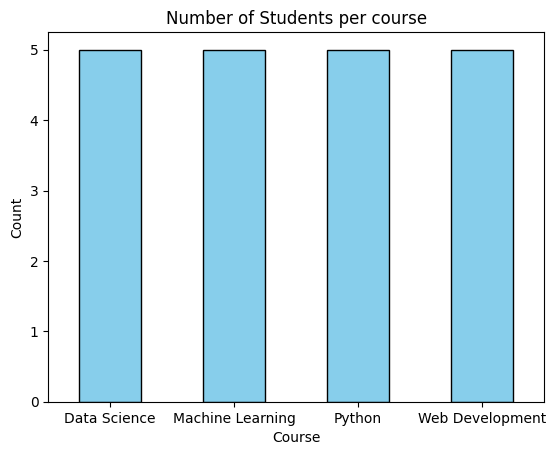

In [22]:
#Data Manipulation and Enhancement
#1-Generate at least two visualisations of the data (using matplotlib)

df = dataframe.groupby('course')['student_id'].count()
df.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.title('Number of Students per course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Excellent: 90-100 - Good: 80-89 - Average: 70-79 - Below Average: below 70
dataframe = dataframe.fillna(0)
conditions = [(dataframe['score'] >= 90), (dataframe['score'] >= 80),
              (dataframe['score'] >= 70)]
grades = ['Excellent', 'Good', 'Average']
dataframe['grade'] = np.select(conditions, grades, default='Below Average')
print(dataframe)

In [ ]:
#Filter the data to show only students with scores above 80
print(dataframe[dataframe['score']>80])

In [ ]:
#Check for and handle any missing values in the dataset
dataframe.fillna(0)

In [ ]:
#Create a function to calculate the average score for each course
def calAvg(list):
  try:
    average = sum(list) / len(list)
    return average
  except Exception as e:
    print(e)


courses = dataframe['course'].drop_duplicates()
#print(courses)
for course in courses:
  avg = calAvg(dataframe[dataframe['course'] == course]['score'])
  print(f"Course {course} average is {avg}")

In [ ]:
#Use pandas functions to group and analyse the data by course
average_by_course = dataframe.groupby('course')['score'].mean()
std_by_course = dataframe.groupby('course')['score'].std()
print(average_by_course, std_by_course)

In [ ]:
#Create visualizations that show the distribution of scores across different courses

plt.scatter(dataframe['course'], dataframe['score'])

plt.title('Course and score distribution')
plt.xlabel('course')
plt.ylabel('score')

plt.show()